### Import libaries

In [1]:
# ! pip install plotly
# !pip install nbformat

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### Import Data

In [4]:
df__bk_rat = pd.read_csv('/Users/royzalta/Downloads/archive/Book reviews/Book reviews/BX-Book-Ratings.csv', sep=';', encoding="latin-1")
df_bk_dt = pd.read_csv('/Users/royzalta/Downloads/archive/Book reviews/Book reviews/BX_Books.csv', sep=';', encoding="latin-1")
df_usr_dt = pd.read_csv('/Users/royzalta/Downloads/archive/Book reviews/Book reviews/BX-Users.csv', sep=';', encoding="latin-1")

### Data Cleaning

In [5]:
df_usr_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [6]:
df_usr_dt.head()

User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

# <center><b>User Demographics<b></center>

## <center><b>Age Analysis<b></center>

### What is the distribution of age of our users ?

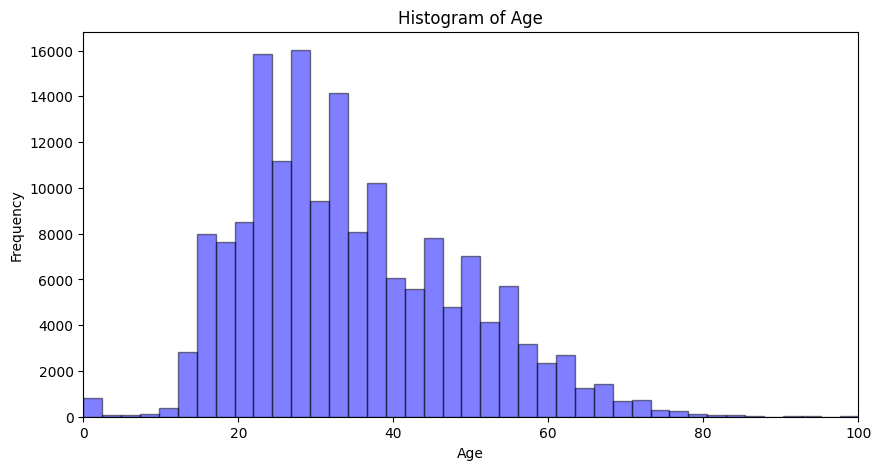

Mean Age: 34.75143370454978
Median Age: 32.0
Mode Age: 24.0


In [22]:
df_usr_dt.hist(column='Age', bins=100, figsize=(10, 5), color='blue', alpha=0.5, grid=False, edgecolor='black')
plt.xlim(0, 100)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()
# Calculate summary statistics
mean_age = df_usr_dt['Age'].mean()
median_age = df_usr_dt['Age'].median()
mode_age = df_usr_dt['Age'].mode().values[0]

# Print the summary statistics
print("Mean Age:", mean_age)
print("Median Age:", median_age)
print("Mode Age:", mode_age)

### most users are between the ages  20- 40 , the mean, median and mode are very close - indicates for a gaussian distribution

### Next, let's create age groups, and add that to the data (it will serve us later when we will divide our users to clusters)

In [24]:
# Define age ranges and corresponding labels
age_ranges = [(0, 17), (18, 25), (26, 35), (36, 45), (46, 55), (56, 100)]
age_labels = ['0-17', '18-25', '26-35', '36-45', '46-55', '56+']

# Create a function to map age to age group
def map_age_group(age):
    for i, (lower, upper) in enumerate(age_ranges):
        if lower <= age <= upper:
            return age_labels[i]
    return 'Unknown'

# Apply the function to create a new column 'Age Group'
df_usr_dt['Age Group'] = df_usr_dt['Age'].map(map_age_group)

# Display the updated dataframe
df_usr_dt.head()

User-ID                            Location   Age         City   
0        1                  nyc, new york, usa   NaN          nyc  \
1        2           stockton, california, usa  18.0     stockton   
2        3     moscow, yukon territory, russia   NaN       moscow   
3        4           porto, v.n.gaia, portugal  17.0        porto   
4        5  farnborough, hants, united kingdom   NaN  farnborough   

             State         Country Age Group  
0         new york             usa   Unknown  
1       california             usa     18-25  
2  yukon territory          russia   Unknown  
3         v.n.gaia        portugal      0-17  
4            hants  united kingdom   Unknown

### We have users which they're age is null, let's see how many and decide what to do with them 

In [28]:
df_usr_dt.isnull().sum()/df_usr_dt.shape[0]*100

User-ID       0.000000
Location      0.000000
Age          39.719857
City          0.000000
State         0.000359
Country       1.641337
Age Group     0.000000
dtype: float64

### the precenatge of users without age is significant

  ## <center><b>Geographic Analysis<b></center>

### How many distinct locations do we have ?

In [29]:
#how many locations are there?
df_usr_dt['Location'].nunique()

57339

### Do we have any users without location data?

In [30]:
#how many null locations?
df_usr_dt['Location'].isnull().sum()

0

### Let's split the location column into city, state and country to have in depth analysis

In [10]:
# Split the 'Location' column into separate columns
location_split = df_usr_dt['Location'].str.split(', ', expand=True)

# Assign the split values to new columns
df_usr_dt['City'] = location_split[0]
df_usr_dt['State'] = location_split[1]
df_usr_dt['Country'] = location_split[2]


In [11]:
#lets see the top 10 cities
df_usr_dt.head()

User-ID                            Location   Age         City   
0        1                  nyc, new york, usa   NaN          nyc  \
1        2           stockton, california, usa  18.0     stockton   
2        3     moscow, yukon territory, russia   NaN       moscow   
3        4           porto, v.n.gaia, portugal  17.0        porto   
4        5  farnborough, hants, united kingdom   NaN  farnborough   

             State         Country  
0         new york             usa  
1       california             usa  
2  yukon territory          russia  
3         v.n.gaia        portugal  
4            hants  united kingdom

In [12]:
import plotly.express as px

# Group the DataFrame by location and calculate the count of users
location_counts = df_usr_dt.groupby(['City', 'State', 'Country']).size().reset_index(name='Count')

# Create a map figure using plotly
fig = px.scatter_geo(
    location_counts,
    locations='City',
    locationmode='country names',
    color='Count',
    hover_name='City',
    hover_data=['State', 'Country', 'Count'],
    projection='natural earth'
)

# Show the map figure
fig.show()


### What are the top 10 countries in number of users ?

In [17]:
#top 10 countries with the most users
top_10_countries = df_usr_dt['Country'].value_counts().head(10).reset_index()
top_10_countries.columns = ['Country', 'Count']
top_10_countries.sort_values(by='Count', ascending=False, inplace=True)
top_10_countries.head(10).style.background_gradient(cmap='Greens')

### What are the top 10 cities in number of users ?

In [18]:
#top 10 cities with the most users
top_10_cities = df_usr_dt['City'].value_counts().head(10).reset_index()
top_10_cities.columns = ['City', 'Count']
top_10_cities.sort_values(by='Count', ascending=False, inplace=True)
top_10_cities.head(10).style.background_gradient(cmap='Greens')

### what are the correlation between locations of different users ?

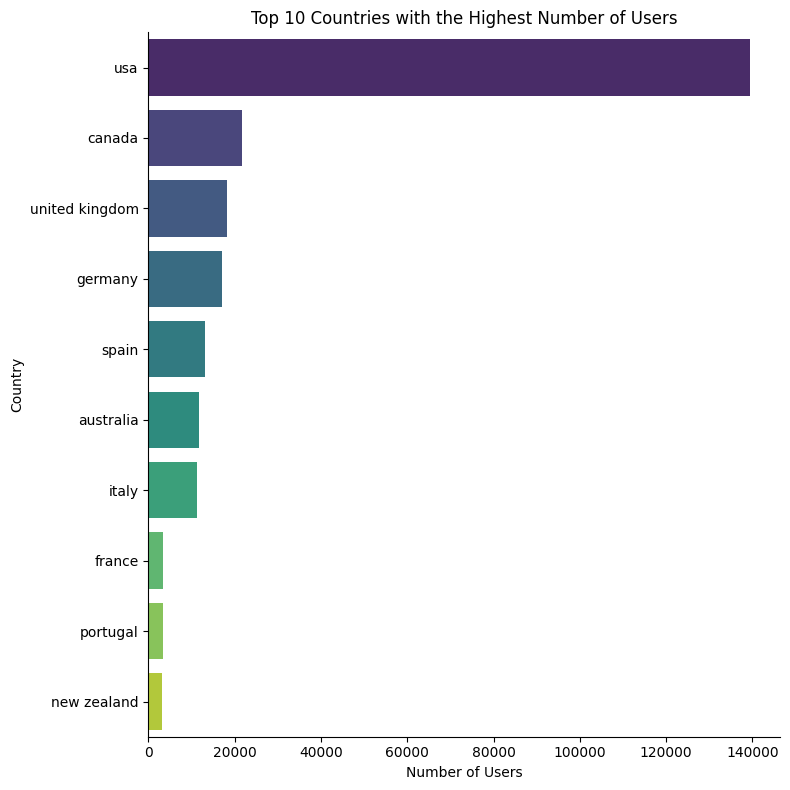

In [35]:
# Count the number of users by country
country_counts = df_usr_dt['Country'].value_counts()

# Select top N countries
N = 10
top_countries = country_counts.head(N)

# Create a pie chart using seaborn
plt.figure(figsize=(8, 8))
sns.countplot(data=df_usr_dt, y='Country', order=top_countries.index, palette='viridis')
plt.title(f'Top {N} Countries with the Highest Number of Users')

# Adjust the appearance
sns.despine()  # Remove the top and right spines
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.tight_layout()  # Adjust the spacing between subplots

plt.show()

Mean Age by Country:
Country
                    37.5
 australia           NaN
 england             NaN
 pasig city.        21.0
&#20013;&#22269;    15.0
&#32654;&#22269;    31.0
*                    NaN
,                   35.5
-                    NaN
-------              NaN
Name: Age, dtype: float64

User Count by Country:
Country
usa               139425
canada             21603
united kingdom     18314
germany            17025
spain              13103
australia          11733
italy              11248
france              3442
portugal            3313
new zealand         3076
Name: count, dtype: int64


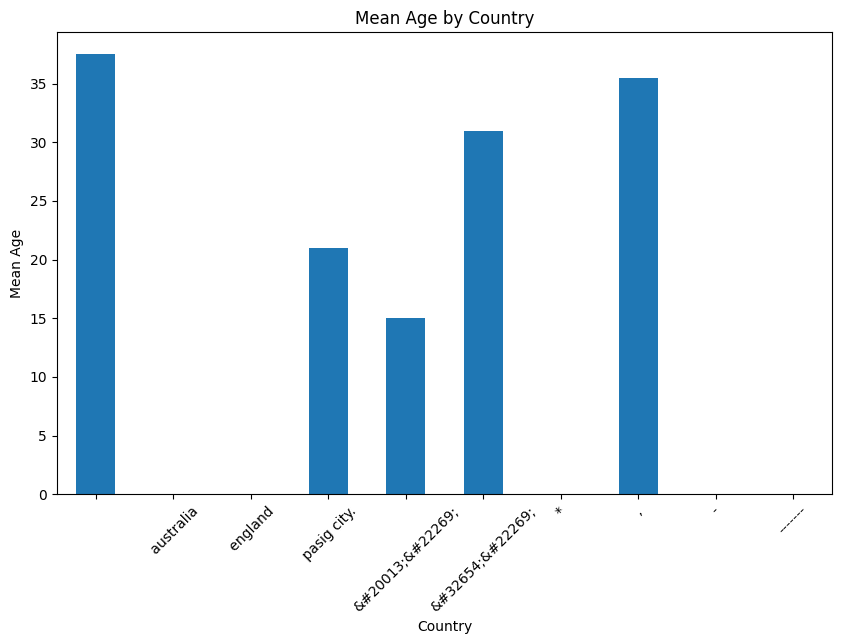

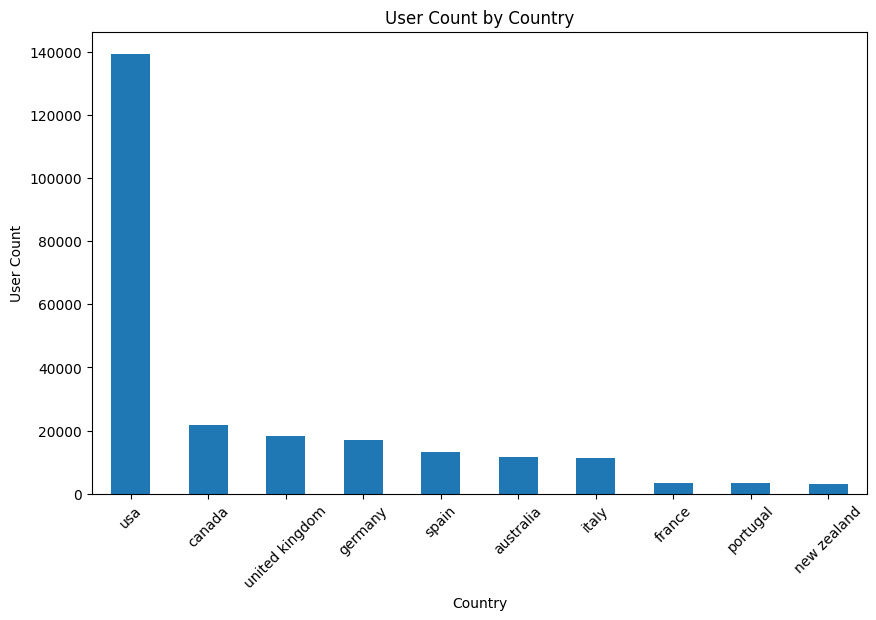

In [37]:
# Group the data by country and calculate the mean age for each country
country_age_mean = df_usr_dt.groupby('Country')['Age'].mean().head(10)

# Group the data by country and calculate the count of users for each country
country_user_count = df_usr_dt['Country'].value_counts().head(10)

# Print the mean age and user count for each country
print("Mean Age by Country:")
print(country_age_mean)
print("\nUser Count by Country:")
print(country_user_count)

# Plot the mean age by country
plt.figure(figsize=(10, 6))
country_age_mean.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Mean Age')
plt.title('Mean Age by Country')
plt.xticks(rotation=45)
plt.show()

# Plot the user count by country
plt.figure(figsize=(10, 6))
country_user_count.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('User Count')
plt.title('User Count by Country')
plt.xticks(rotation=45)
plt.show()


## <center><b>User Segmentation <b></center>

In [19]:
df_usr_dt.head()

User-ID                            Location   Age         City   
0        1                  nyc, new york, usa   NaN          nyc  \
1        2           stockton, california, usa  18.0     stockton   
2        3     moscow, yukon territory, russia   NaN       moscow   
3        4           porto, v.n.gaia, portugal  17.0        porto   
4        5  farnborough, hants, united kingdom   NaN  farnborough   

             State         Country  
0         new york             usa  
1       california             usa  
2  yukon territory          russia  
3         v.n.gaia        portugal  
4            hants  united kingdom